# Bloch Equation

The Bloch Equation, named after physicist Felix Bloch who won the Nobel Prize for discovery of magnetic resonance phenomena, describes almost all behavior seen in MRI.  Here, we will describe this equation and derive key results to use for explaining the behavior of the net magnetization and its interaction with magnetic fields.

In [1]:
% setup MRI-education-resources path and requirements
cd ../
startup

loading image
loading signal


## Learning Goals

1. Understand what MRI is measuring
    * Understand what the net magnetization is
1. Describe the concepts of polarization, resonance, and relaxation
    * Describe the rotation of the net magnetization in response to magnetic fields
    * Describe the process of relaxation 

## THE Bloch Equation

The Bloch equation describes the behavior of the net magnetization, $\vec{M}(\vec{r},t)$, in a magnetic field, $\vec{B}(\vec{r},t)$, and can describe the vast majority of all MRI phenomena.  While the complete Bloch Equation is presented here, we can typically use results derived from this equation to analyze and design MRI experiments.

$$
\frac{d\vec{M}(\vec{r},t)}{dt} =
\gamma \vec{M}(\vec{r},t) \times \vec{B}(\vec{r},t)
+
\begin{bmatrix}
-1/T_2(\vec{r})& 0 & 0 \\
0 & -1/T_2(\vec{r}) & 0 \\
0 & 0 & -1/T_1(\vec{r})
\end{bmatrix}
\vec{M}(\vec{r},t)
+
\begin{bmatrix}
 0 \\
 0 \\
M_0(\vec{r})/T_1(\vec{r})
\end{bmatrix}
$$

The beavhior depends on constants of:
* $M_0(\vec{r})$ - the equilibrium magnetization
* $T_1(\vec{r})$ - the longitudinal ($M_Z$) or spin-lattice relaxation time constant
* $T_2(\vec{r})$ - the transverse ($M_{XY}$) or spin-spin relaxation time constant

All of which can vary across our subject (and all a valuable source of contrast!).

## Precession

The first term in the Bloch equation means that the 
net magnetization, $\vec{M}$ rotates around the magnetic field, $\vec{B}$, with a left-handed rotation.  This rotation is sometimes referred to as precession.

To observe this, we neglect relaxation ($T_1, T_2 \rightarrow \infty$):

$$
\frac{d\vec{M}(t)}{dt} =
\gamma \vec{M}(t) \times \vec{B}(t)
$$


![RF reception](images/RF_reception.gif)

In [2]:
B0 = 1.5e3; % 1.5 T = 1500 mT
% using units of mT and ms for the bloch_rotate function

% start at equilibrium
Mstart = [0,0,1].'; 
% after RF excitation
Mstart = [1,0,0].'; 


Bstatic = [0,0,B0];

% animate rotation?
dt = .1e-6; % .1 ns = .1e-6 ms
N = 300;
t = [1:N]*dt;
Mall = zeros(3,N);
Mall(:,1) = Mstart;
for It = 1:N-1
    Mall(:,It+1) = bloch_rotate(Mall(:,It),dt,Bstatic);
end

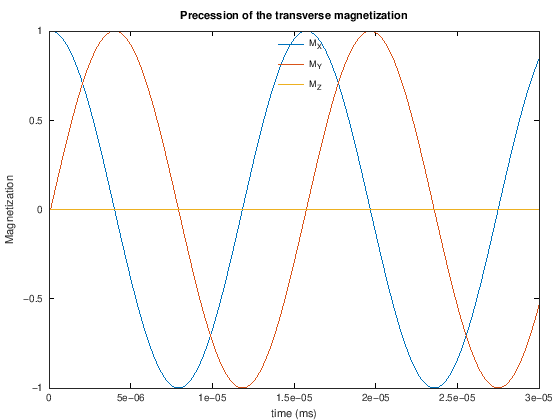

In [3]:
plot(t,Mall)
xlabel('time (ms)'), ylabel('Magnetization')
legend({'M_X', 'M_Y', 'M_Z'}, 'location', 'north'), legend boxoff
title(['Precession of the transverse magnetization'])

## RF Excitation

RF excitation occurs when an oscillating magnetic field is applied orthogonally to the main magnetic field.  If we apply RF at the Larmor frequency, the magnetic field would be

$$\vec{B}(\vec{r},t) = 
\begin{bmatrix}
B_{1}^+(\vec{r},t) \cos(2\pi\bar{\gamma} B_0 t) \\
B_{1}^+(\vec{r},t) \sin(2\pi\bar{\gamma} B_0 t) \\
B_0
\end{bmatrix}$$

When applied at the Larmor frequency, the applied RF energy and the net magnetization are in resonance, and we achieve excitation.

### Example: Constant amplitude pulse

A good first RF excitation pulse to consider is a constant amplitude RF pulse, $B_{1}^+(\vec{r},t) = B_{1,0}$.  When this is applied on resonance, the Bloch equation results in a progressive rotation of the net magnetization away from the z-axis, as illustrated below:

![RF excitation Lab Frame](images/RF_hard_lab_frame_on-resonance.gif)

### Lab versus Rotating Frame

For simplification, we use the so-called "rotating frame" - a reference frame that is rotating around the main field (z-axis) at the Larmor frequency, $f_0 = \bar{\gamma} B_0$, which greatly simplifies the interpretation, visualization, and math when analyzing the Bloch equation.  This is in contrast to the "lab frame" or "stationary frame".

In the rotating frame, the magnetic field vector is transformed to both have the rotation of the RF pulse terms removed.  In this transformation of reference frames, the main magnetic field, $B_0$, is also removed.  This change in the representation removes the precession of $\vec{M}$ around the z-axis, as we should expect in the rotating frame.

$$\vec{B}(t) = 
\begin{bmatrix}
B_{1,X}^+(\vec{r},t) \\
B_{1,Y}^+(\vec{r},t) \\
0
\end{bmatrix}$$

Now we can analyze RF excitation as a rotation around RF magnetic field amplitude and do not have to include Larmor frequency in our analysis, shown in the illustration below:

![RF excitation Rotating Frame](images/RF_hard_rotating_frame_on-resonance.gif)


For another illustration of the stationary/lab versus rotating frames, try the "Change Frame" option in this Bloch simulator:

http://drcmr.dk/BlochSimulator/



### Common flip angle RF excitations

| ![RF 45-degree flip](images/RF_45flip.gif) | ![RF 90-degree flip](images/RF_90flip.gif) | ![RF 180-degree flip](images/RF_180flip.gif) |
| :-: | :-: | :-: |
| 45-degree flip | 90-degree flip | 180-degree flip |

### Simulations 

The following Bloch equation simulations show
1. First, when a non-resonant magnetic field is applied.   An additional magnetic field is applied orthogonal to the main magnetic field, but *not* applied at the Larmor frequency, and there is no creation of transverse magnetization.
1. After, this is corrected, and the RF pulse is applied at the Larmor frequency, $\omega_0 = \gamma B_0$.  With a resonant RF pulse, we have excitation of the net magnetization away from the direction of the main magnetic field, and creation of transverse magnetization, $M_X$ and $M_Y$.
1. Finally, the simulation is converted into the rotating from.  It is hard to visualize the transverse magnetization in the lab because it is rotating at the Larmor frequency.  The excitation is more clearly visualized in the rotating frame 

In [4]:
% lab frame

gammabar = 42.58; % kHz/mT

B0 = 10; %  10 mT for simplicity to visualize rotation
f0 = gammabar*B0 % kHz

M0 = 1;
M_equilibrium = [0,0,M0].';

% RF pulse paarameters
T_RF =  1; % ms
t = linspace(0, T_RF, 4000);

RF_flip_angle = pi/2; % radians
B10 = RF_flip_angle / (2*pi*gammabar*T_RF) % mT


f0 =  425.80
B10 =  0.0058713


In [5]:
% RF not applied at resonance frequency (constant magnetic field in X)
% lab frame
B = [B10;0;B0];  

Mall = zeros(3,length(t));
Mall(:,1) = M_equilibrium;
for It = 1:length(t)-1
    Mall(:,It+1) = bloch_rotate(Mall(:,It),t(It+1) - t(It),B);
end

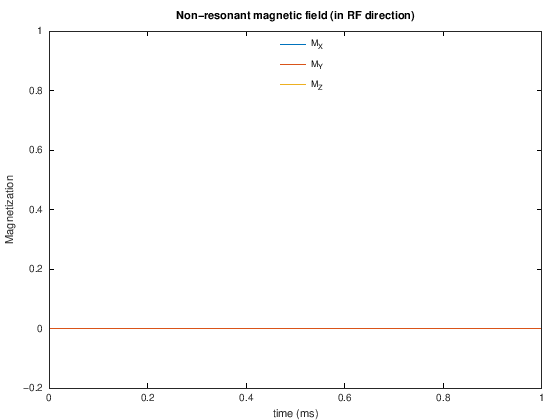

In [6]:
plot(t,Mall)
xlabel('time (ms)'), ylabel('Magnetization')
legend({'M_X', 'M_Y', 'M_Z'}, 'location', 'north'), legend boxoff
title(['Non-resonant magnetic field (in RF direction)'])

In [7]:
% RF pulse at Larmor frequency
% lab frame
B = [B10*cos(2*pi*f0*t);B10*-sin(2*pi*f0*t);B0*ones(1,length(t))];  

Mall = zeros(3,length(t));
Mall(:,1) = M_equilibrium;
for It = 1:length(t)-1
    Mall(:,It+1) = bloch_rotate(Mall(:,It),t(It+1) - t(It),B(:,It));
end

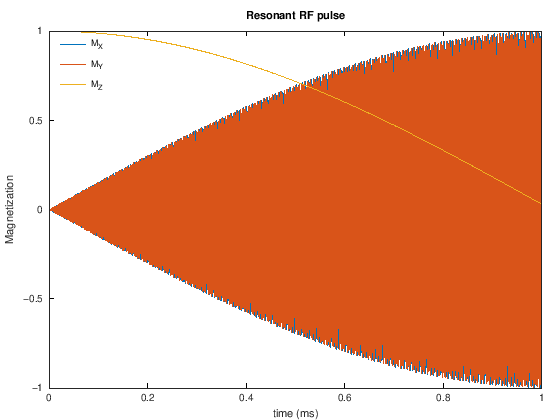

In [8]:
plot(t,Mall)
xlabel('time (ms)'), ylabel('Magnetization')
legend({'M_X', 'M_Y', 'M_Z'}, 'location', 'northwest'), legend boxoff
title(['Resonant RF pulse'])

In [9]:
% rotating frame
% RF pulse at Larmor frequency
B = [B10;0;0];  

Mall = zeros(3,length(t));
Mall(:,1) = M_equilibrium;
for It = 1:length(t)-1
    Mall(:,It+1) = bloch_rotate(Mall(:,It),t(It+1) - t(It),B);
end

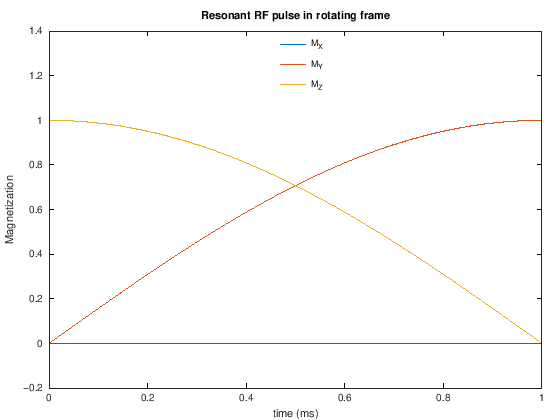

In [10]:
plot(t,Mall)
xlabel('time (ms)'), ylabel('Magnetization')
legend({'M_X', 'M_Y', 'M_Z'}, 'location', 'north'), legend boxoff
title(['Resonant RF pulse in rotating frame'])

## Relaxation

The other key result of the Bloch equation is that the net magnetization will return to equilibriuam over time with specific time constants, called $T_1$ and $T_2$.  More specifically relaxation depends on
* $M_0(\vec{r})$ - the equilibrium magnetization, where the magnetic field ultimately is oriented in the same direction as the main magnetic field along the z-axis as: $\vec{M}(\vec{r}, t \rightarrow \infty) = [0, 0, M_0(\vec{r})]^T$
* $T_1(\vec{r})$ - the longitudinal ($M_Z$) or spin-lattice relaxation time constant
* $T_2(\vec{r})$ - the transverse ($M_{XY}$) or spin-spin relaxation time constant

In the rotating frame, without any applied RF energy, the Bloch equation is simplified to

$$
\frac{d\vec{M}(t)}{dt} =
\begin{bmatrix}
-1/T_2& 0 & 0 \\
0 & -1/T_2 & 0 \\
0 & 0 & -1/T_1
\end{bmatrix}
\vec{M}(t)
+
\begin{bmatrix}
 0 \\
 0 \\
M_0/T_1
\end{bmatrix}
$$

This has solutions of

$$
\vec{M}(t) =
\begin{bmatrix}
e^{-t/T_2} & 0 & 0 \\
0 & e^{-t/T_2} & 0 \\
0 & 0 & e^{-t/T_1}
\end{bmatrix}
\vec{M}(0)
+
\begin{bmatrix}
 0 \\
 0 \\
M_0(1-e^{-t/T_1})
\end{bmatrix}
$$

or

$$M_{XY}(t) = M_{XY}(0) e^{-t/T_2}$$

$$M_Z(t) = M_Z(0)e^{-t/T_1} + M_0(1- e^{-t/T_1})$$

Where here the shorthand complex notation for the transverse magnetization is being used: $M_{XY}(\vec{r},t) = M_X(\vec{r},t) + i M_Y(\vec{r},t)$

In [11]:
t = linspace(0,1); % s

M0=1;
T1 = .8;  T2 = .1; % s
M_equilibrium = [0,0,M0].';

flip= 90;

gammabar = 42.58; % kHz/mT
T = 1; % 1 ms pulse duration
% calculate RF pulse amplitude (milliTesla)
B10 = flip*pi/180 / (2*pi*gammabar*T)

% apply RF tip
M_start = bloch_rftip(M_equilibrium, T, B10)

Mall = zeros(3,length(t));

for It = 1:length(t)
    Mall(:,It) = bloch_relax(M_start,t(It),M0,T1, T2);
end

B10 =  0.0058713
M_start =

  -6.1230e-17
   1.0000e+00
   6.1230e-17



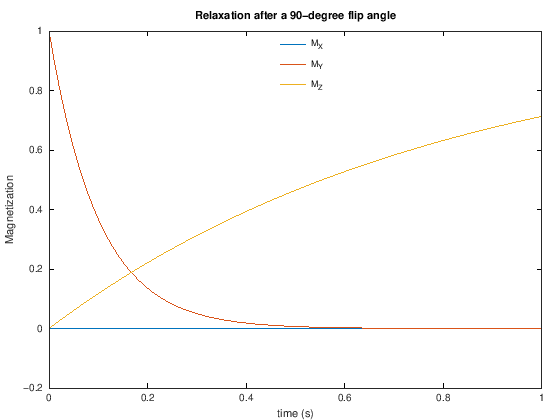

In [12]:
plot(t,Mall)
xlabel('time (s)'), ylabel('Magnetization')
legend({'M_X', 'M_Y', 'M_Z'}, 'location', 'north'), legend boxoff
title(['Relaxation after a ' num2str(flip) '-degree flip angle'])

**T1 and T2 relaxation after RF Excitation**

![Relaxation T1 and T2](images/relaxation_t1t2.gif)